In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score
%matplotlib inline 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Reading Data
#df=pd.read_csv(r'D:\Upgrad\Lead Scoring Assignment\Leads.csv')
#df.head()

In [6]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
df.shape

(9240, 37)

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### DATA CLEANING:

In [9]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

##### There are missing data in the data
#### The dataset has 30 object columns & 5 numeric columns

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)

In [11]:
missing_value_df

,_name,percent_missing
Lead Quality,Lead Quality,51.590909
Asymmetrique Activity Index,Asymmetrique Activity Index,45.649351
Asymmetrique Profile Score,Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,Asymmetrique Activity Score,45.649351
Asymmetrique Profile Index,Asymmetrique Profile Index,45.649351
Tags,Tags,36.287879
Lead Profile,Lead Profile,29.318182
What matters most to you in choosing a course,What matters most to you in choosing a course,29.318182
What is your current occupation,What is your current occupation,29.112554
Country,Country,26.634199


### The practice is to remove columns having null value greater than 15%. Lets check row wise missing values

In [12]:
#Getting total number of nulls
total = df.isnull().sum(axis=1).sort_values(ascending=False)
#Getting Percentage values
percent1 = (df.isnull().sum(axis=1)/df.isnull().count(axis=1)).sort_values(ascending=False)
missing_data1 = pd.concat([total, round(percent1*100,2)], axis=1, keys=['Total', 'Percent'])
missing_row = missing_data1.loc[missing_data1['Percent'] >= 30.00]
missing_row.shape

(645, 2)

- Around 645 rows has more than 30% missing values

- But before removing we are checking if there is any chance to impute the values to column

In [13]:
### We can observe Lead Quality has the higest missing value.checking the unique value
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [14]:
### Having null values in these column we can assume that the executive might have missed filling the details. 
####Hence It is same as Not sure 
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

In [15]:
### We got equal missing value percentage for Asymmetrique Activity Index,Asymmetrique Profile Score,Asymmetrique Activity Score 
### and Asymmetrique Profile Index.
print(df['Asymmetrique Activity Index'].unique())
print(df['Asymmetrique Profile Score'].unique())
print(df['Asymmetrique Activity Score'].unique())
print(df['Asymmetrique Profile Index'].unique())

['02.Medium' '01.High' '03.Low' nan]
[15. 20. 17. 18. 14. 16. 13. 19. 12. nan 11.]
[15. 14. 13. 17. 16. 11. 12. 10.  9.  8. 18. nan  7.]
['02.Medium' '01.High' '03.Low' nan]


### looking at the data it is clear data imputation will not add any value droping the value

In [16]:
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [17]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

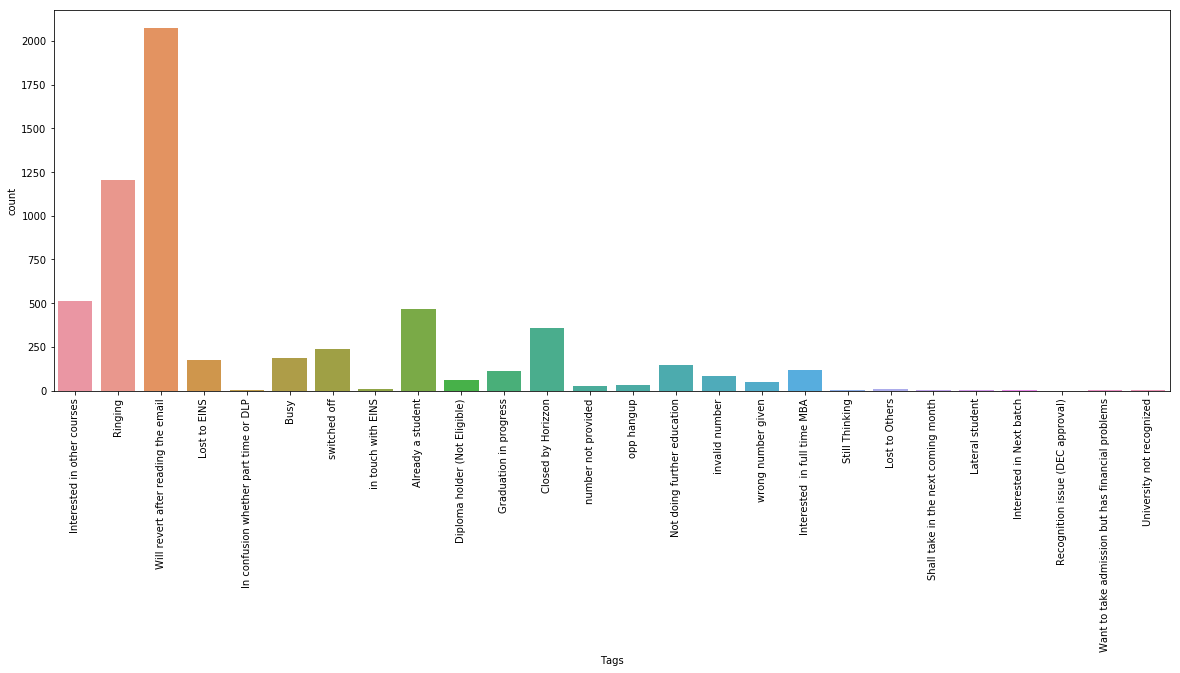

In [18]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Tags'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [19]:
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [20]:
## We can replace the missing Tag values with "Will revert after reading the email" as it is having highest frequency
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

In [21]:
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

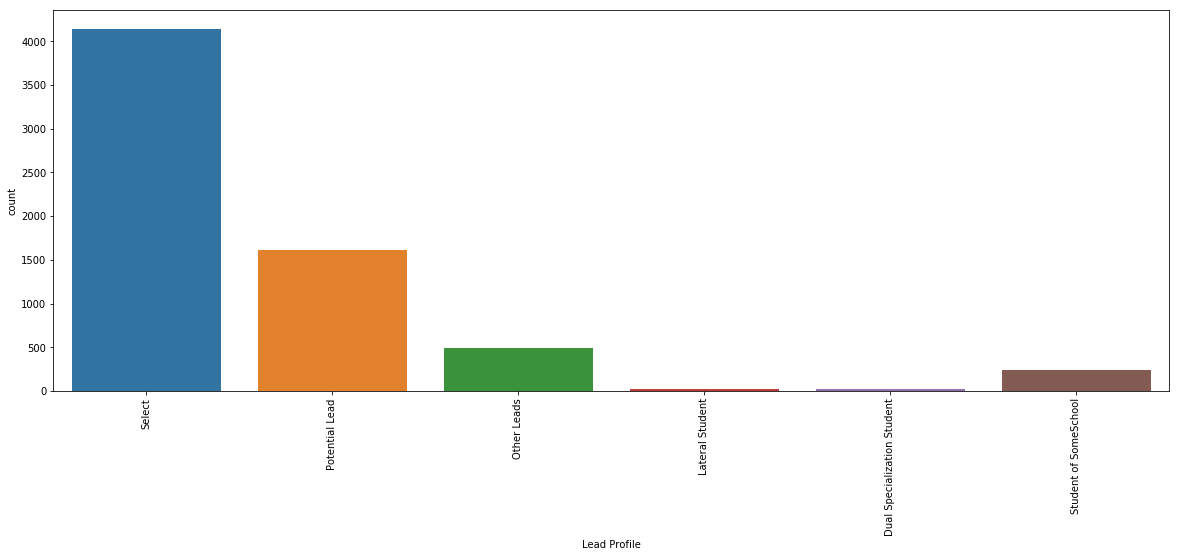

In [22]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Lead Profile'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [23]:
l = df.loc[df['Lead Profile'] == 'Select']
l.shape

(4146, 33)

#### Most of the data falls under select replacing the null values with Select, We will deal with the Value Select during Univariate analysis

In [24]:
df['Lead Profile'] = df['Lead Profile'].replace(np.nan, 'Select')

In [25]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

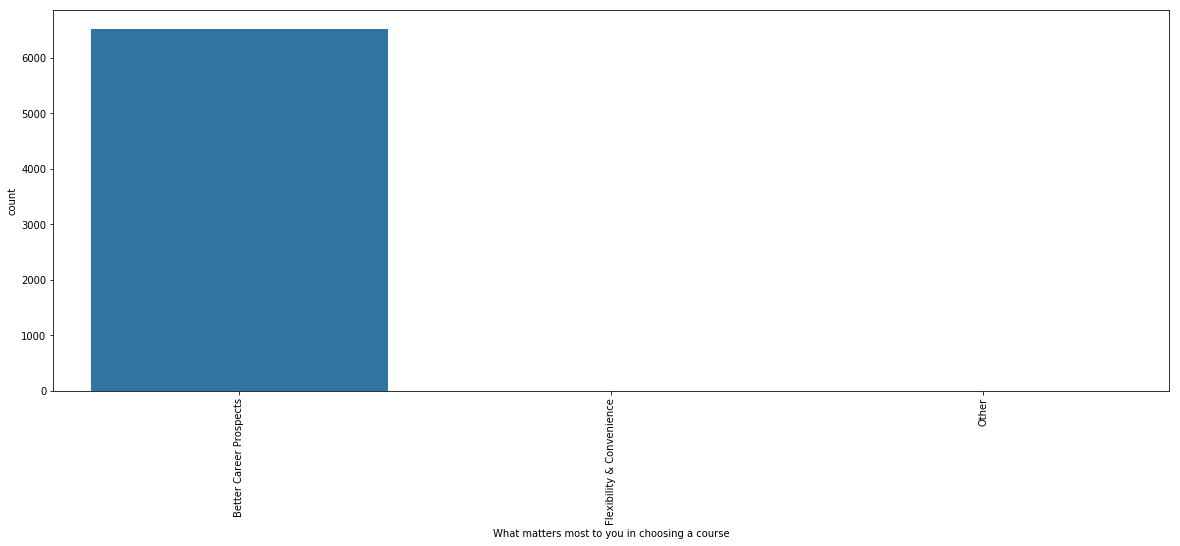

In [26]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['What matters most to you in choosing a course'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Since the data is not filled we can replace them with Other which makes the best sense

In [27]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Other')

In [28]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [29]:
### Here also Replacing the value with Other
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Other')

In [30]:
df['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

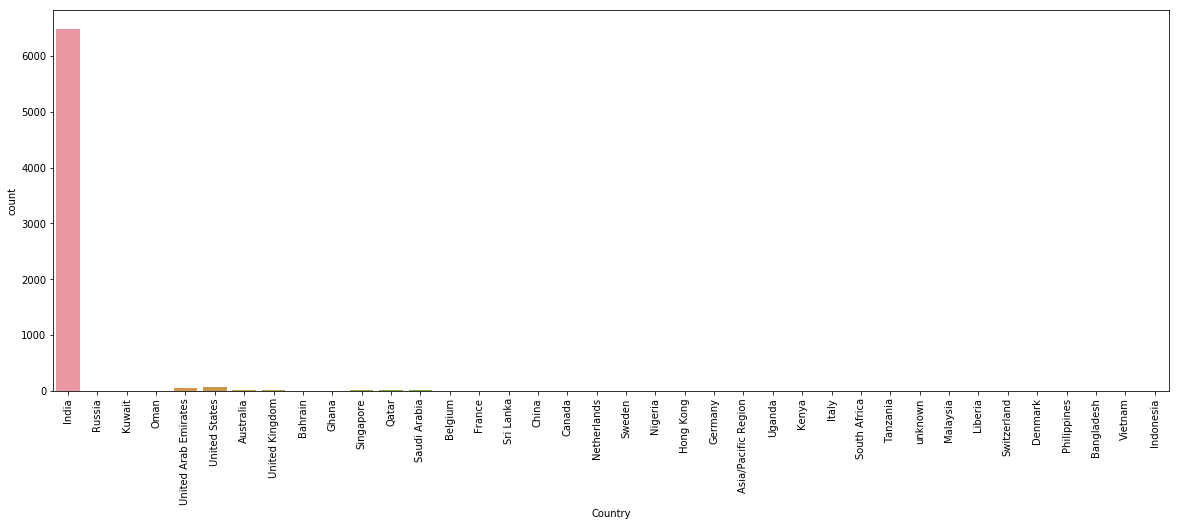

In [31]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Country'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [32]:
## Checking the city value and if city is filled then we can impute values
val=df[df['Country'].isnull()]
val['City'].unique()

array(['Select', nan, 'Thane & Outskirts', 'Other Cities of Maharashtra',
       'Mumbai', 'Other Cities', 'Other Metro Cities', 'Tier II Cities'],
      dtype=object)

In [33]:
# we can replace country as india where the city is in Mumbai,Other Cities of Maharashtra and Thane & Outskirts 
# and the other as Unknown
#df['Country'].loc[df['City'].isin('Mumbai') or 'Other Cities of Maharashtra','Thane & Outskirts'),'India']
df.loc[(df['City']=='Mumbai') | (df['City']=='Other Cities of Maharashtra') | (df['City']=='Thane & Outskirts'),'Country'] = "India"

In [34]:
val=df[df['Country'].isnull()]
val['City'].unique()

array(['Select', nan, 'Other Cities', 'Other Metro Cities',
       'Tier II Cities'], dtype=object)

In [35]:
## Replacing the rest of countries with unknown

In [36]:
df['Country'] = df['Country'].replace(np.nan, 'unknown')

In [37]:
df['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

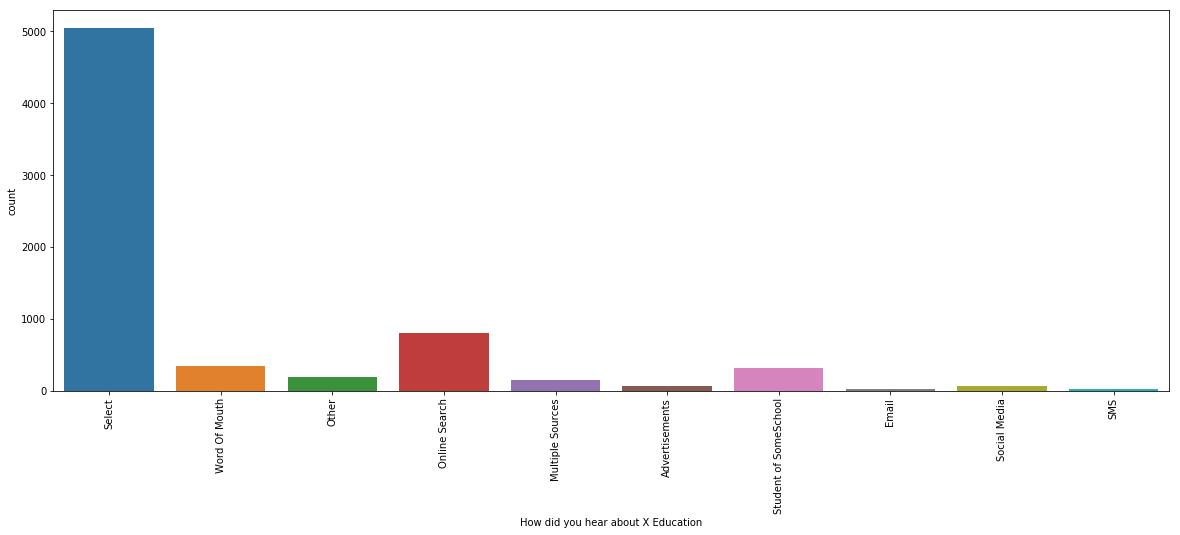

In [38]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['How did you hear about X Education'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [39]:
# Replacing with Select
# Replacing with Select and will deal with select during univariate analysis
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace(np.nan, 'Select')

In [40]:
df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [41]:
## Here also we can replace with Select and deal with select duting univariate analysis
df['Specialization'] = df['Specialization'].replace(np.nan, 'Select')

In [42]:
df['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

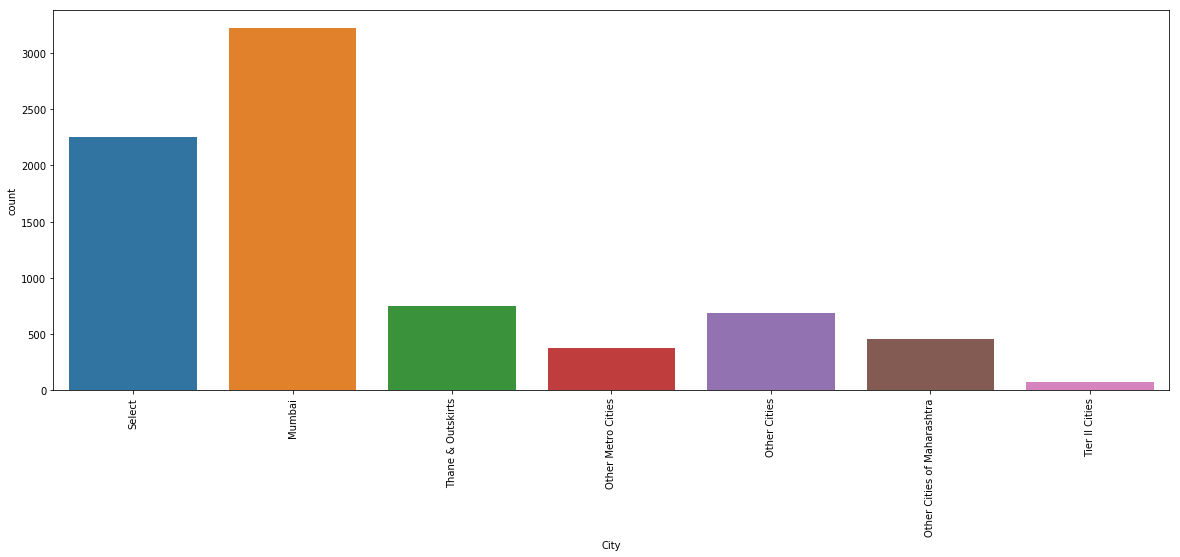

In [43]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['City'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [44]:
## Here also we can replace with Select and deal with it during univariate analysis
df['City'] = df['City'].replace(np.nan, 'Select')

In [45]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
Page Views Per Visit,Page Views Per Visit,1.482684
TotalVisits,TotalVisits,1.482684
Last Activity,Last Activity,1.114719
Lead Source,Lead Source,0.389610
Digital Advertisement,Digital Advertisement,0.000000
Through Recommendations,Through Recommendations,0.000000
Receive More Updates About Our Courses,Receive More Updates About Our Courses,0.000000
Tags,Tags,0.000000
Lead Quality,Lead Quality,0.000000
Update me on Supply Chain Content,Update me on Supply Chain Content,0.000000


In [46]:
df.dropna(inplace = True)

### There are not more than 1% missing value

In [47]:
## Variable categorisation
# identifying numeric and categorical variables
df.dtypes.value_counts()

object     28
int64       3
float64     2
dtype: int64

In [48]:
## Cheking for Duplicates
df[df.duplicated(keep='last')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### There are no Duplicates

- After missing value deletion & imputations, we have 5 numerical variables & 15 categorical variables

In [49]:
df.info

<bound method DataFrame.info of                                Prospect ID  Lead Number              Lead Origin       Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit                 Last Activity               Country                     Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                   Tags       Lead Quality Update me on Supply Chain Content Get updates on DM Content                 Lead Profile                         City I agree to pay the amount through cheque A free copy of Mastering The Interview     Last Notable Activity
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API        Olark Chat           No          No          0     

In [50]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [51]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


## EDA

## Univariate Analysis

### NUMERICAL VARIABLES
- Numerical variables are: Lead Number, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit


### Lead Number:
- Lead Number is the number assigned to each lead procured and it will be unique for each lead - no distribution or count can be observed

In [52]:
df = df.drop('Lead Number',axis=1)

### Converted:

- Lets first look at the distribution of our target variable converted

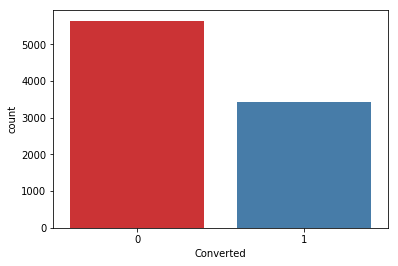

In [53]:
sns.countplot(df['Converted'],palette='Set1')
plt.show()

- 0 means lead not converted & 1 means lead converted
- We can observe that no of leads converted is less that leads not converted
- Lets also look at the conversion percentage

In [54]:
conversion_percentage = round(((sum(df['Converted'])/len(df))*100),2)
conversion_percentage

37.86

- The conversion percentage is 37.86. There is imbalance in the data, but its not too high

### Total Visits:

In [55]:
df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

- The difference between max value & 75th percentile is very huge, indicating outliers present in the data.Lets visualise the same using box plot

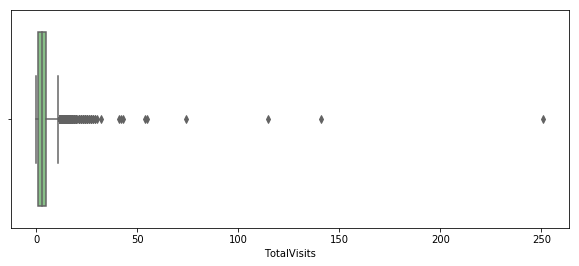

In [56]:
plt.figure(figsize=(10,4))
sns.boxplot(df['TotalVisits'],palette='Accent')

##### It is observed that the values for the above columns are huge. So as a part of treating the Ouliers, we l try to floor and cap the va;ues wrt 5th and 95th percentiles

In [57]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

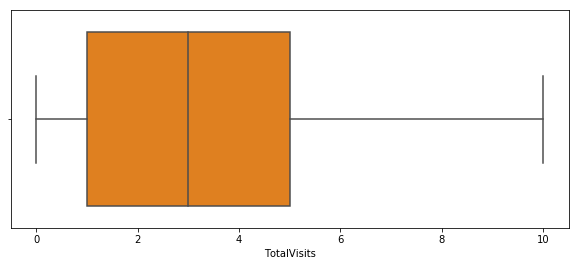

In [58]:
plt.figure(figsize=(10,4))
sns.boxplot(df['TotalVisits'],palette='autumn')

Text(0.5, 0, 'TARGET VARIABLE')

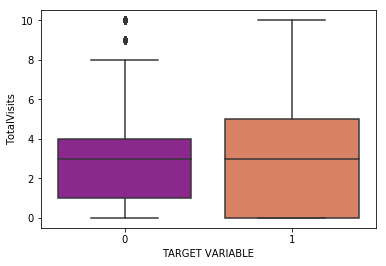

In [59]:
# plotting TotalVisits wrt target variable
sns.boxplot(x = "Converted", y = "TotalVisits", data = df, palette='plasma')
plt.xlabel("TARGET VARIABLE")

- Converted median is same as not converted
- TotalVisits does not seem to affect the variable as no pattern is observed

### Total Time Spent on Website:

In [60]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

- The statistical spread looks reasonably ok.Lets visualise the same using box plot to get a concrete idea

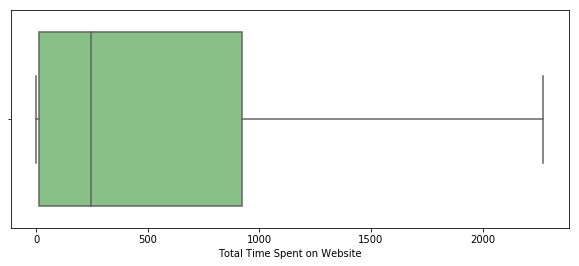

In [61]:
plt.figure(figsize=(10,4))
sns.boxplot(df['Total Time Spent on Website'],palette='Accent')

- There are no outliers in this variable.
- Lets do analysis of this varaible wrt out target variable

Text(0.5, 0, 'TARGET VARIABLE')

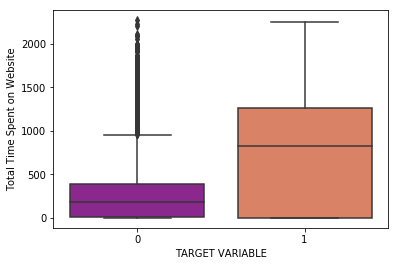

In [62]:
sns.boxplot(x = "Converted", y = "Total Time Spent on Website", data = df, palette='plasma')
plt.xlabel("TARGET VARIABLE")

- Coverted median is way above not converted
- More the time spent on the website,  more potential is the lead
- website should be made interactive so as to attract more visits and to increase the time spent on the same to increase the potential and hot leads

### Page Views Per Visit:

In [63]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

- The difference between max value & 75th percentile is very huge, indicating outliers present in the data.Lets visualise the same using box plot

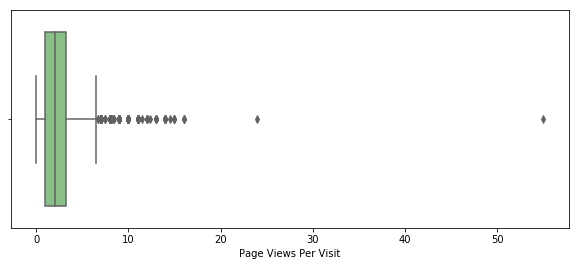

In [64]:
plt.figure(figsize=(10,4))
sns.boxplot(df['Page Views Per Visit'],palette='Accent')

##### It is observed that the values for the above columns are huge. So as a part of treating the Ouliers, we l try to floor and cap the va;ues wrt 5th and 95th percentiles

In [65]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

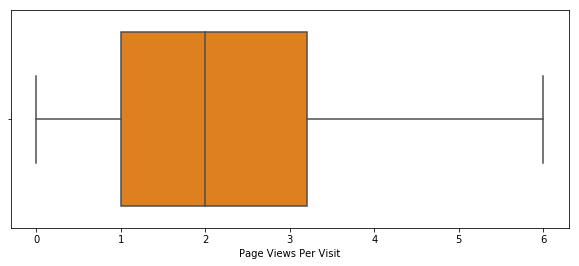

In [66]:
plt.figure(figsize=(10,4))
sns.boxplot(df['Page Views Per Visit'],palette='autumn')

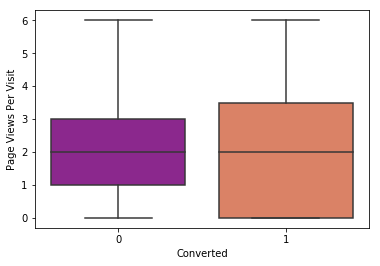

In [67]:
# plotting Page Views Per Visit wrt target variable
sns.boxplot(x = "Converted", y = "Page Views Per Visit", data = df, palette='plasma')

- Coverted median is almost equal to not converted converted
- No pattern observed and hence does not influence the target variable

### CATEGORICAL VARIABLES

In [68]:
### checking the value of individual columns
### Starting with Yes/No column 

### Do Not Email & Do Not Call:

In [69]:
df['Do Not Email'].unique()

array(['No', 'Yes'], dtype=object)

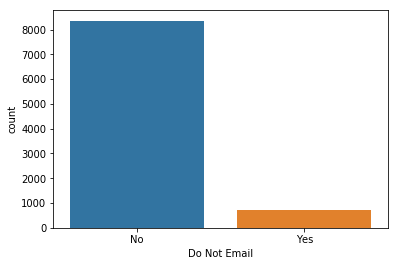

In [70]:
s=sns.countplot(df['Do Not Email'])
plt.show()

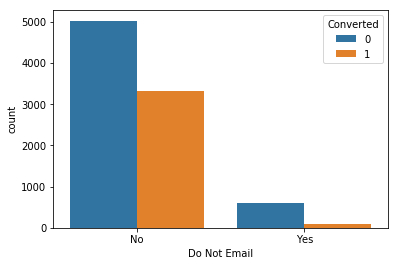

In [71]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df)

- Number of No is more than yes
- Conversion for No is more

In [72]:
df['Do Not Call'].unique()

array(['No', 'Yes'], dtype=object)

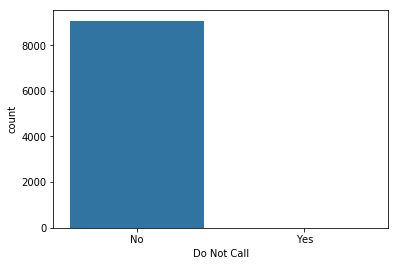

In [73]:
s=sns.countplot(df['Do Not Call'])
plt.show()

In [74]:
df['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [75]:
## There is only 2 Yes this column wont be highly contributing to the model deleting the same
df = df.drop(['Do Not Call'],1)

### Search & Magazine:

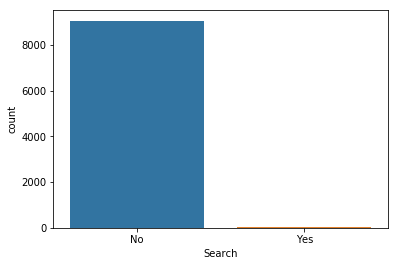

In [76]:
s=sns.countplot(df['Search'])
plt.show()

In [77]:
df['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

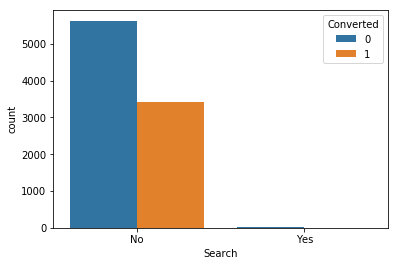

In [78]:
sns.countplot(x = "Search", hue = "Converted", data = df)

In [79]:
## There is only 14 Yes this column wont be highly contributing to the model deleting the same
df = df.drop(['Search'],1)

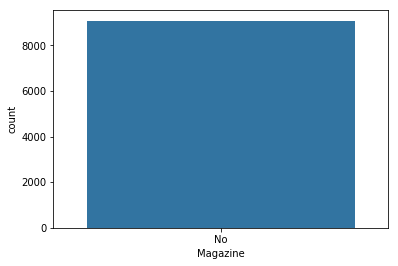

In [80]:
s=sns.countplot(df['Magazine'])
plt.show()

In [81]:
## There is only No this column wont be contributing to the model deleting the same
df = df.drop(['Magazine'],1)

### Newspaper article,X Education Forums, Newspaper, Digital Advertisement,Through Recommendations:

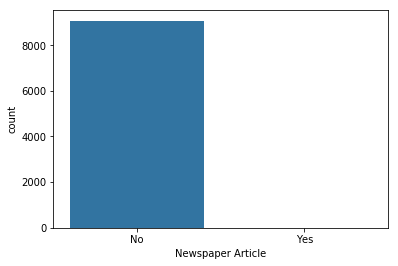

In [82]:
s=sns.countplot(df['Newspaper Article'])
plt.show()

In [83]:
df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [84]:
## There is only 2 Yes this column wont be highly contributing to the model deleting the same
df = df.drop(['Newspaper Article'],1)

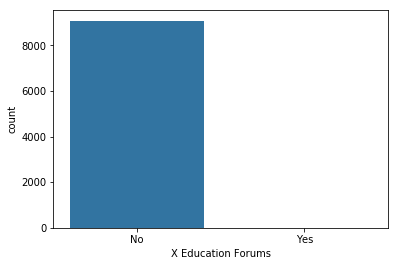

In [85]:
s=sns.countplot(df['X Education Forums'])
plt.show()

In [86]:
df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [87]:
## There is only 1 Yes this column wont be highly contributing to the model deleting the same
df = df.drop(['X Education Forums'],1)

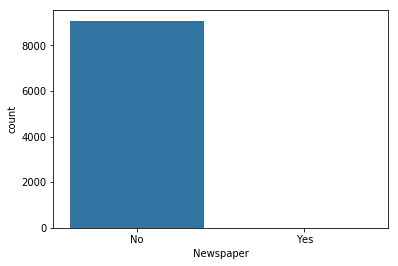

In [88]:
s=sns.countplot(df['Newspaper'])
plt.show()

In [89]:
df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [90]:
## There is only 1 Yes this column wont be highly contributing to the model deleting the same
df = df.drop(['Newspaper'],1)

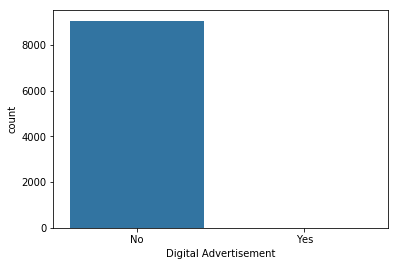

In [91]:
s=sns.countplot(df['Digital Advertisement'])
plt.show()

In [92]:
df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [93]:
## There is only 4 Yes this column wont be highly contributing to the model deleting the same
df = df.drop(['Digital Advertisement'],1)

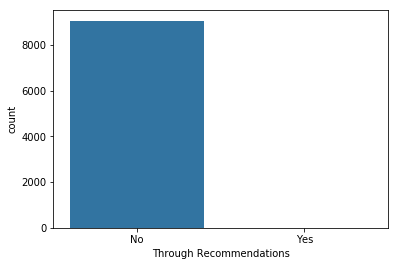

In [94]:
s=sns.countplot(df['Through Recommendations'])
plt.show()

In [95]:
df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [96]:
## There is only 7 Yes this column wont be highly contributing to the model deleting the same
df = df.drop(['Through Recommendations'],1)

### Receive More Updates About Our Courses & Update me on Supply Chain Content :

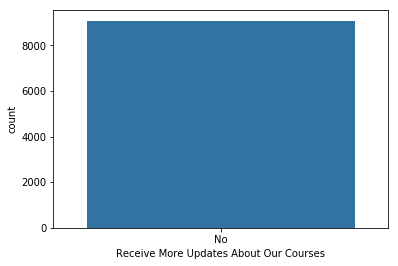

In [97]:
s=sns.countplot(df['Receive More Updates About Our Courses'])
plt.show()

In [98]:
## There is only No this column wont be contributing to the model deleting the same
df = df.drop(['Receive More Updates About Our Courses'],1)

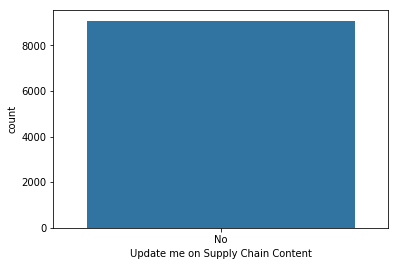

In [99]:
s=sns.countplot(df['Update me on Supply Chain Content'])
plt.show()

In [100]:
## There is only No this column wont be contributing to the model deleting the same
df = df.drop(['Update me on Supply Chain Content'],1)

### Get updates on DM Content & I agree to pay the amount through cheque:

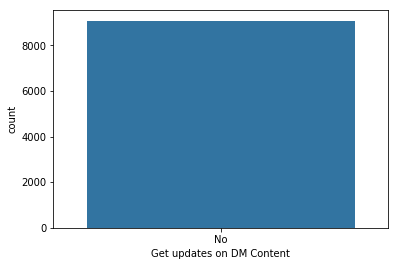

In [101]:
s=sns.countplot(df['Get updates on DM Content'])
plt.show()

In [102]:
## There is only No this column wont be contributing to the model deleting the same
df = df.drop(['Get updates on DM Content'],1)

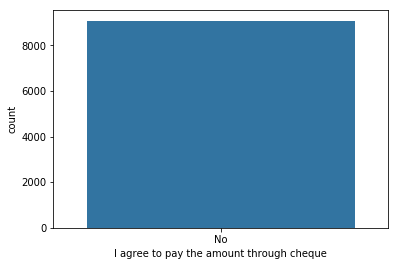

In [103]:
s=sns.countplot(df['I agree to pay the amount through cheque'])
plt.show()

In [104]:
## There is only No this column wont be contributing to the model deleting the same
df = df.drop(['I agree to pay the amount through cheque'],1)

### A free copy of Mastering The Interview:

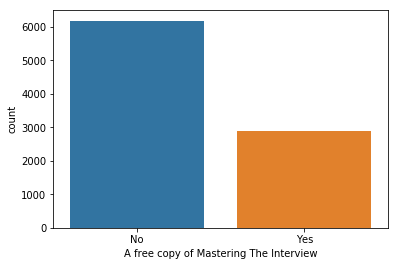

In [105]:
s=sns.countplot(df['A free copy of Mastering The Interview'])
plt.show()

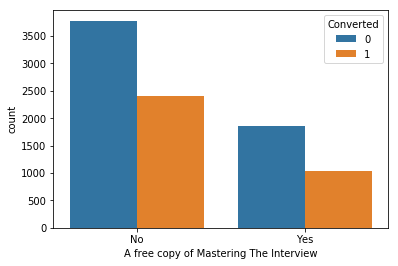

In [106]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df)

- Number of no is more than yes
- Conversion is more when 'yes' lead selects No for the feature 'A free copy of Mastering The Interview'

In [107]:
df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

### Lead Origin:

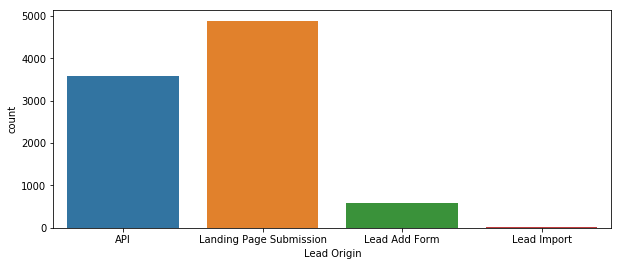

In [108]:
fig = plt.figure(figsize = (10,4))
s=sns.countplot(df['Lead Origin'])
plt.show()

In [109]:
### Combining lead Add From and Lead Import 
df['Lead Origin'] = df['Lead Origin'].replace(['Lead Add Form','Lead Import'], 'Other_Channel')

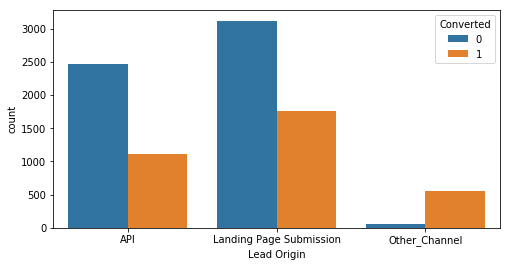

In [110]:
fig = plt.figure(figsize = (8,4))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)

- Converted is more for the value ‘Landing page submission’

### Lead Source:

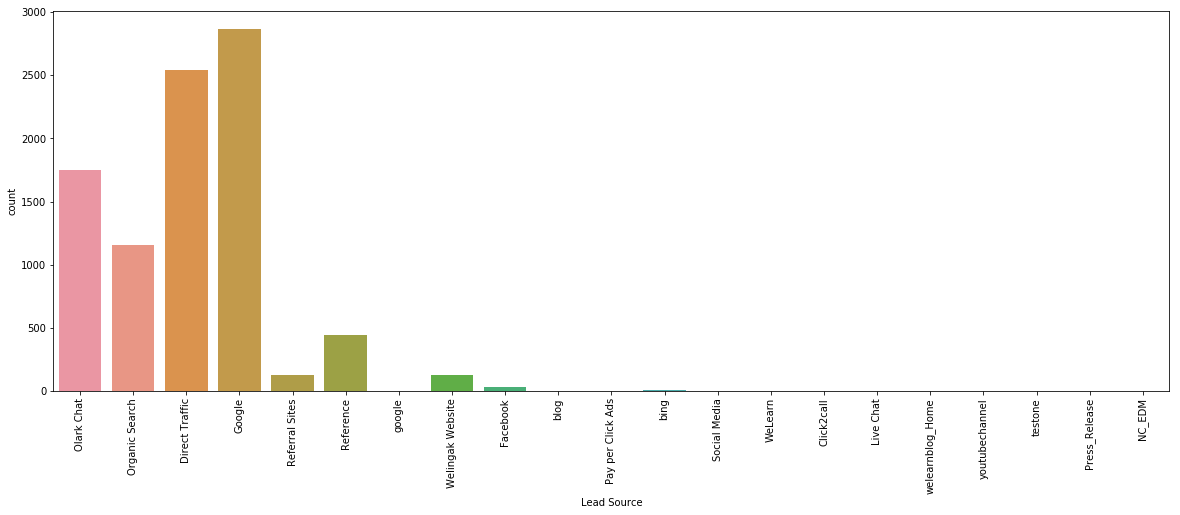

In [111]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Lead Source'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [112]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

- As many values are lesser in number, we can combine relevant values to a common name


In [113]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [114]:
## From the chart we can see there are many channels that have very few values we can combine them to form a new channel
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home'], 'Other_Channel')

In [115]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'Other_Channel', 'Social Media', 'youtubechannel'], dtype=object)

In [116]:
#We can cobine youtubechannel to social media 
df['Lead Source'] = df['Lead Source'].replace(['Social Media','youtubechannel','Facebook'], 'Social_Channels')

In [117]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website',
       'Social_Channels', 'Other_Channel'], dtype=object)

In [118]:
## Combining Welingak Website and Referral Sites as Affiliates
df['Lead Source'] = df['Lead Source'].replace(['Welingak Website','Referral Sites'], 'Affiliate')

In [119]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Affiliate', 'Reference', 'Social_Channels', 'Other_Channel'],
      dtype=object)

### Last Activity:

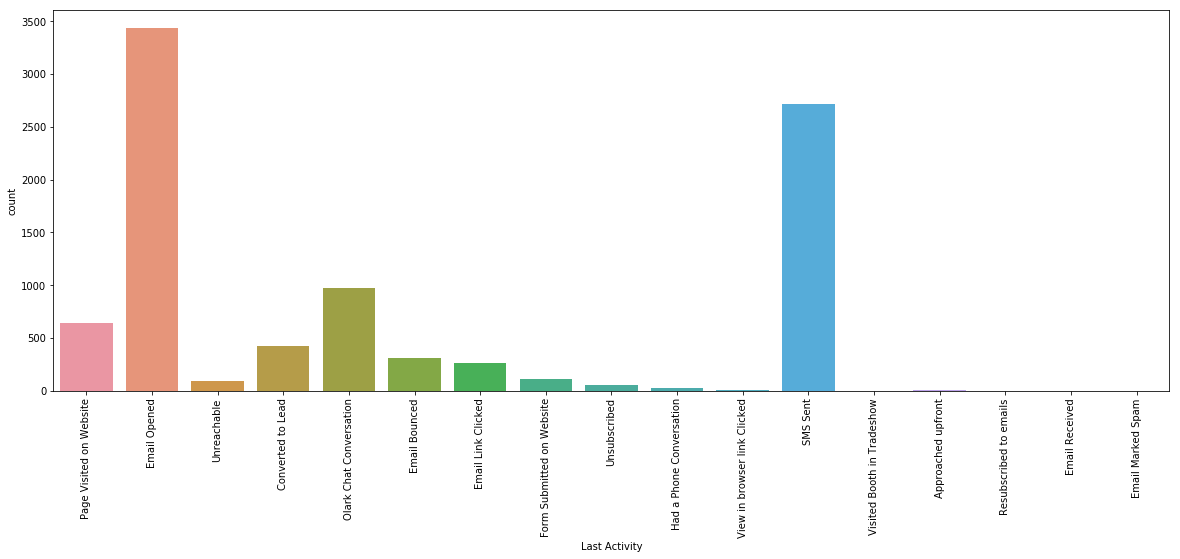

In [120]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Last Activity'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [121]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [122]:
### Combining the low count activities
df['Last Activity'] = df['Last Activity'].replace(['Email Marked Spam','Email Received','Resubscribed to emails','Approached upfront','Visited Booth in Tradeshow',
                                                  'View in browser link Clicked'], 'Low_Activity')

In [123]:
### Combining the Unreachable activities
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Email Bounced','Unsubscribed'], 'Cannot_Identify')
df['Last Activity'] = df['Last Activity'].replace(['Visited Booth in Tradeshow','Approached upfront'], 'Face_To_Face')

In [124]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Cannot_Identify',
       'Converted to Lead', 'Olark Chat Conversation',
       'Email Link Clicked', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Low_Activity', 'SMS Sent'],
      dtype=object)

### Country:

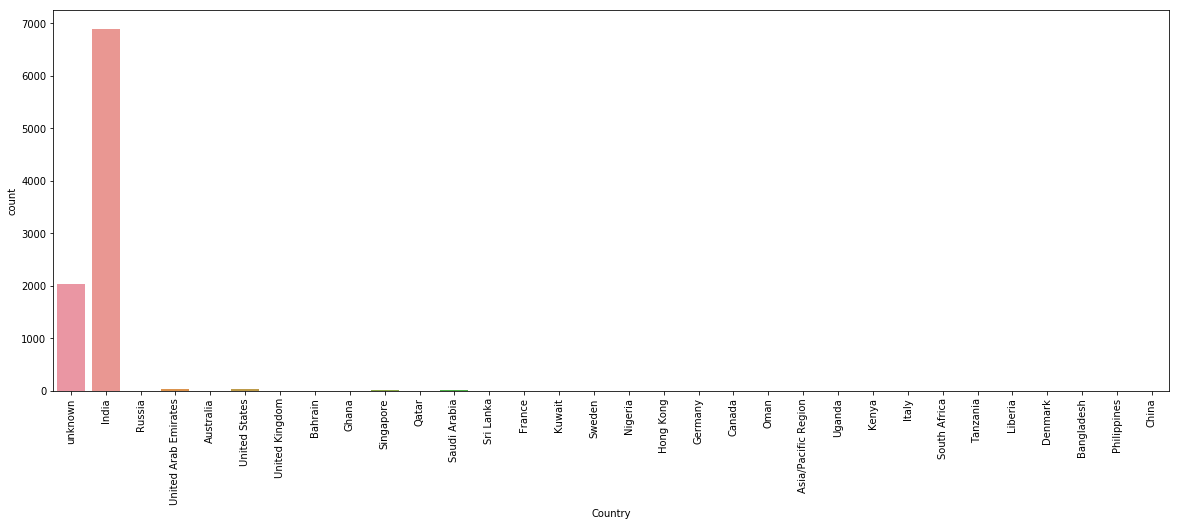

In [125]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Country'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [126]:
### Almost 90% is India and rest is unknown there is no information from this colum deleting the same
df = df.drop(['Country'],1)

### Specialization:

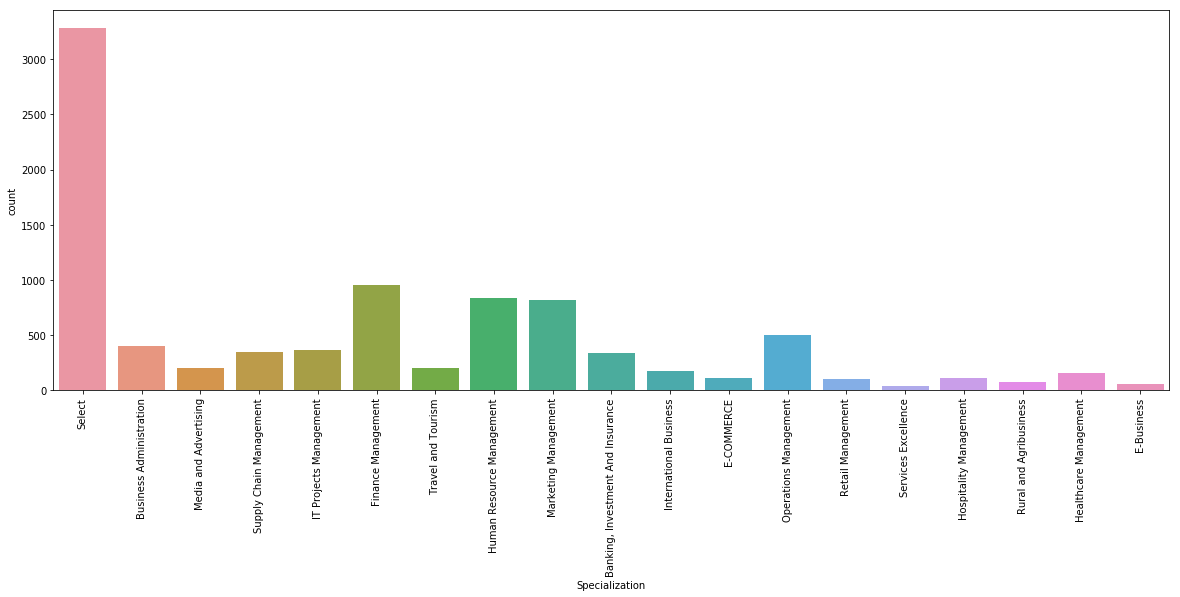

In [127]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Specialization'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [128]:
### As we can see most of the entry is not filled this may not be an issue as the students may not take a dicision during the initial time 
### We can possiblity call it Undecided
df['Specialization'] = df['Specialization'].replace(['Select'], 'Undecided')

In [129]:
df['Specialization'].unique()

array(['Undecided', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [130]:
## Combining management branch
df['Specialization'] = df['Specialization'].replace(['Supply Chain Management','IT Projects Management','Finance Management','Human Resource Management'
                                                    ,'Marketing Management','Operations Management','Retail Management','Hospitality Management',
                                                    'Healthcare Management'], 'Management')

In [131]:
## Combining Business branch
df['Specialization'] = df['Specialization'].replace(['Business Administration','International Business','Rural and Agribusiness',
                                                    'E-Business'], 'Business')

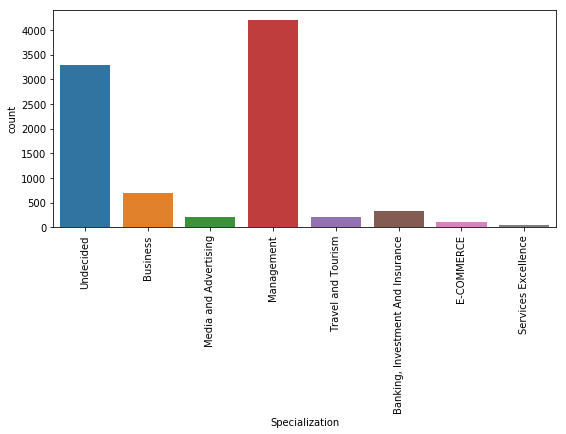

In [132]:
fig = plt.figure(figsize = (9,4))
s=sns.countplot(df['Specialization'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### How did you hear about X Education:

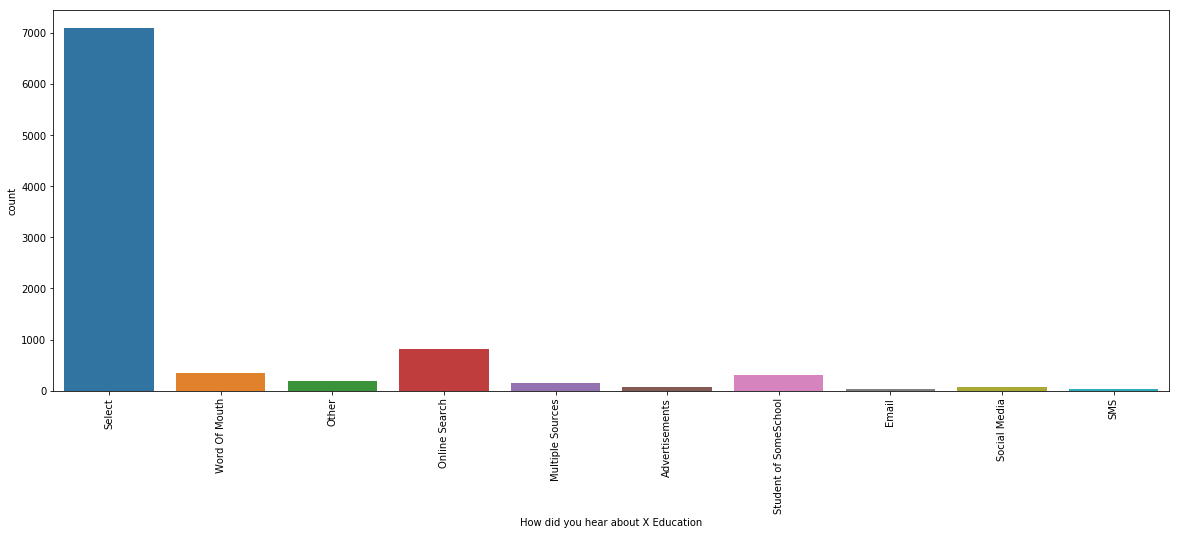

In [133]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['How did you hear about X Education'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [134]:
### As select has high percentage, its as good as null values, we can drop the column
df = df.drop(['How did you hear about X Education'],1)

### What is your current occupation:

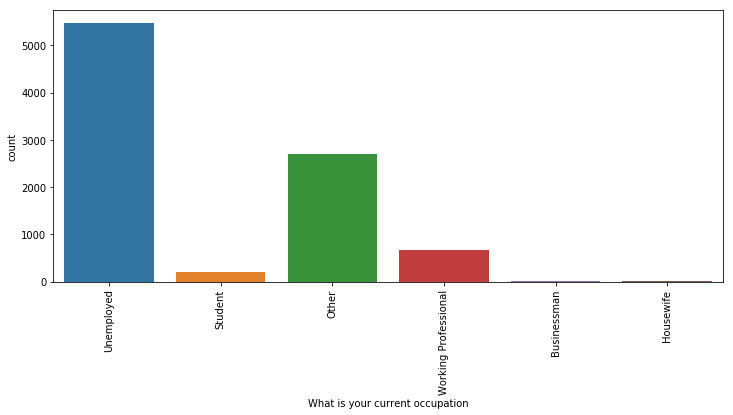

In [135]:
fig = plt.figure(figsize = (12,5))
s=sns.countplot(df['What is your current occupation'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [136]:
### There are very few Busninessman and house wife combining with others
df['What is your current occupation'] = df['What is your current occupation'].replace(['Businessman','Housewife'], 'Other')

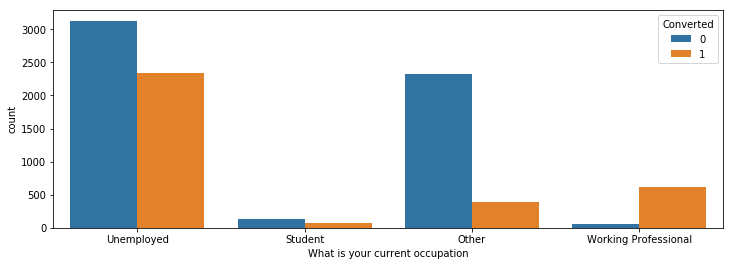

In [137]:
fig = plt.figure(figsize = (12,4))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)

- Converted is more for unemployed
- Sales team shpuld concentrate more on unemployed leads to increase the conversion

### What matters most to you in choosing a course:

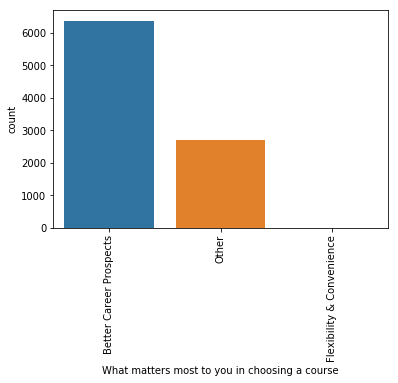

In [138]:
s=sns.countplot(df['What matters most to you in choosing a course'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [139]:
## Combining Flexibility & Convenience to Other
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(['Flexibility & Convenience'], 'Other')

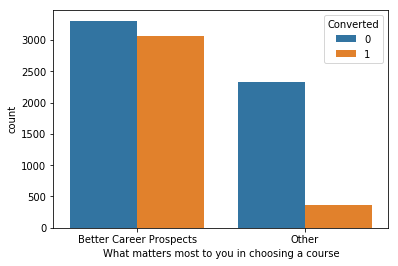

In [140]:
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = df)

- Leads who wants better career aspects has equal conversion and non conversion rate
- Leads who chooseother mostly do not get converted

In [141]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

### Tags:

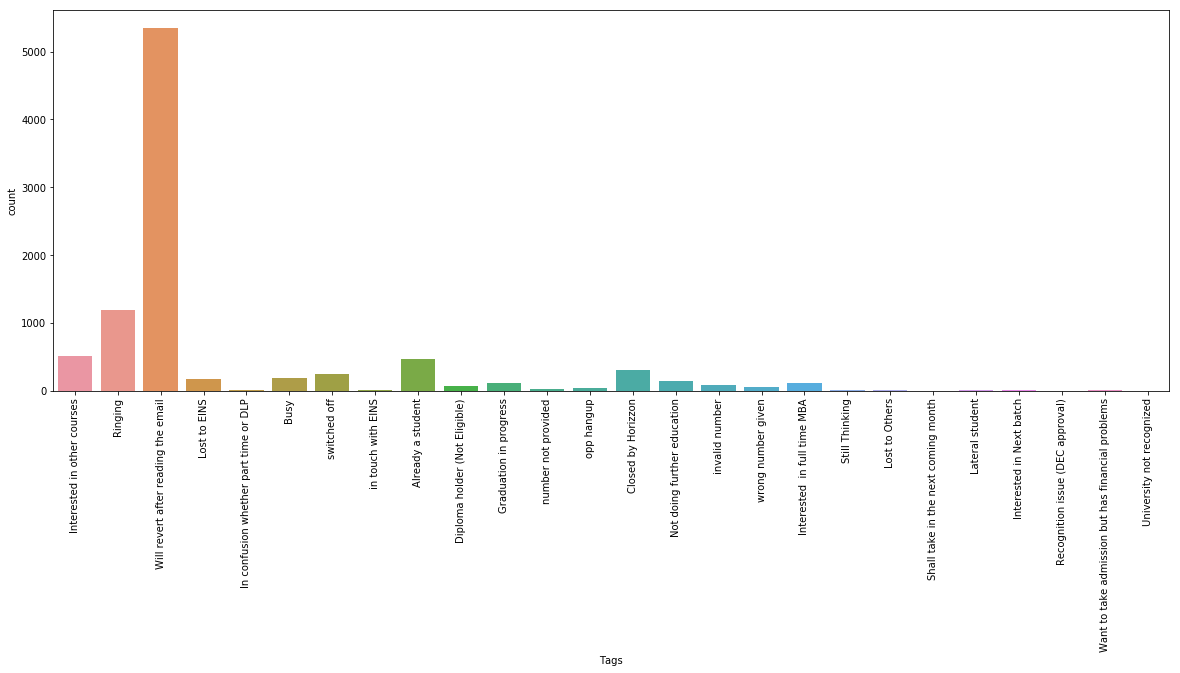

In [142]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Tags'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [143]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [144]:
## There are many with less value we can combine them
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Basic_Tags')

In [145]:
df['Tags'] = df['Tags'].replace(['invalid number','wrong number given','Busy','switched off'], 'phone_tags')
df['Tags'] = df['Tags'].replace(['Already a student','Not doing further education'], 'student_tags')
df['Tags'] = df['Tags'].replace(['Lost to EINS','Closed by Horizzon'], 'miscellaneous')
df['Tags'] = df['Tags'].replace(['Interested in other courses','Interested  in full time MBA'], 'other_intrerests')

In [146]:
df['Tags'].unique()

array(['other_intrerests', 'Ringing',
       'Will revert after reading the email', 'miscellaneous',
       'Basic_Tags', 'phone_tags', 'student_tags'], dtype=object)

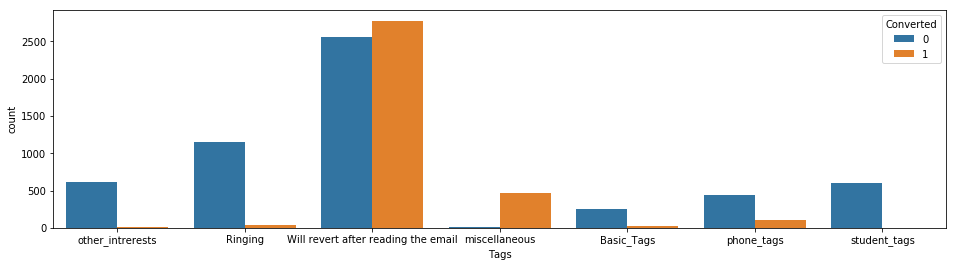

In [147]:
fig = plt.figure(figsize = (16,4))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.show()

- As many values are lesser in number, we can combine relevant values to a common name- 
- Leads who are tagged as will revert after reading email has equal conversion and non conversion rate


### Lead Quality:

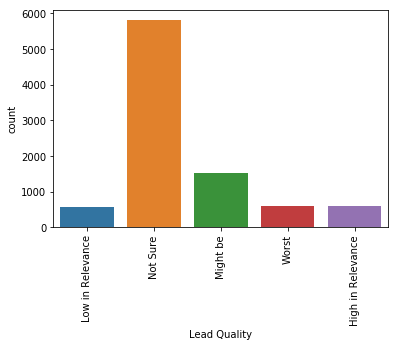

In [148]:
s=sns.countplot(df['Lead Quality'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [149]:
df['Lead Quality'] = df['Lead Quality'].replace(['Low in Relevance','Worst'], 'Low_worst_relevence')

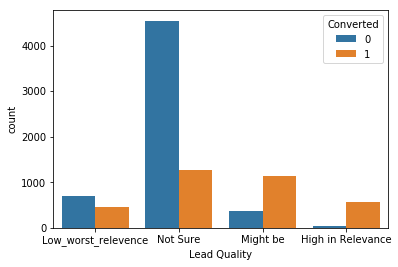

In [150]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = df)
plt.show()

- Lead Quality with not sure mostly do not get converted


### Lead Profile:

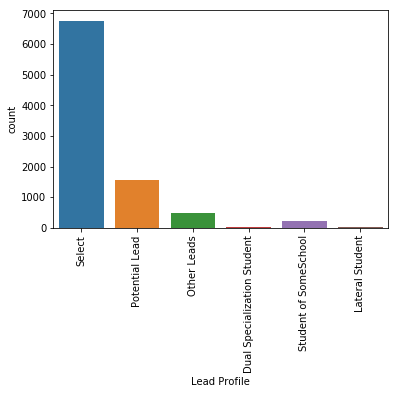

In [151]:
s=sns.countplot(df['Lead Profile'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [152]:
## changing to other leads
df['Lead Profile'] = df['Lead Profile'].replace(['Select'], 'Other Leads')
df['Lead Profile'] = df['Lead Profile'].replace(['Dual Specialization Student','Student of SomeSchool','Lateral Student'], 'student Leads')

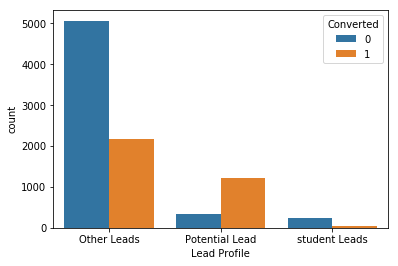

In [153]:
sns.countplot(x = "Lead Profile", hue = "Converted", data = df)
plt.show()

- Lead profile with other leads has lesser conversion rate
- Potential lead profile has better conversion rate


### City:

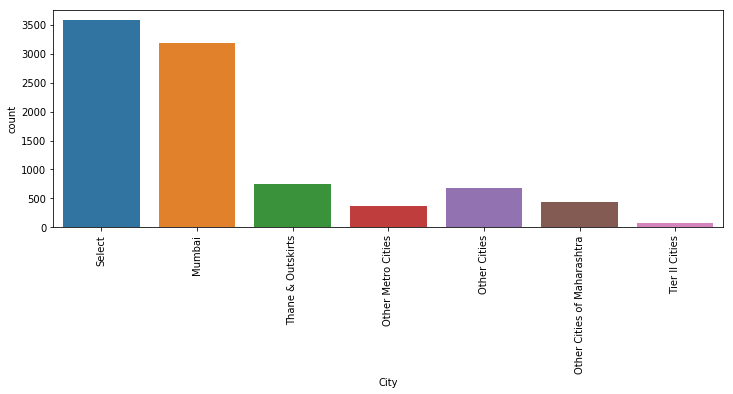

In [154]:
fig = plt.figure(figsize = (12,4))
s=sns.countplot(df['City'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [155]:
df['City'].unique()

array(['Select', 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [156]:
## most of the members are from mumbai changing to mumbai
df['City'] = df['City'].replace(['Select'], 'Mumbai')
df['City'] = df['City'].replace(['Thane & Outskirts'], 'Other Cities of Maharashtra')
df['City'] = df['City'].replace(['Other Metro Cities','Other Cities','Tier II Cities'], 'other cities')

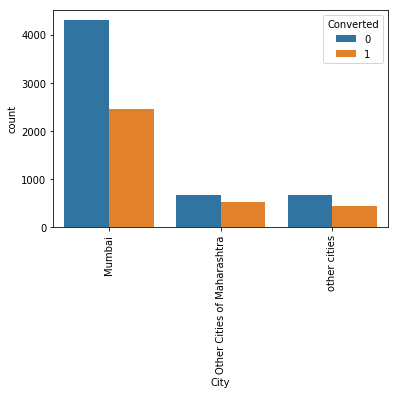

In [157]:
s = sns.countplot(x = "City", hue = "Converted", data = df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- As many values are lesser in number, we can combine relevant values to a common name
- Leads from Mumbai city are the most converted leads


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                                      9074 non-null object
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074 non-null object
Tags                                             9074

### Last Notable Activity:

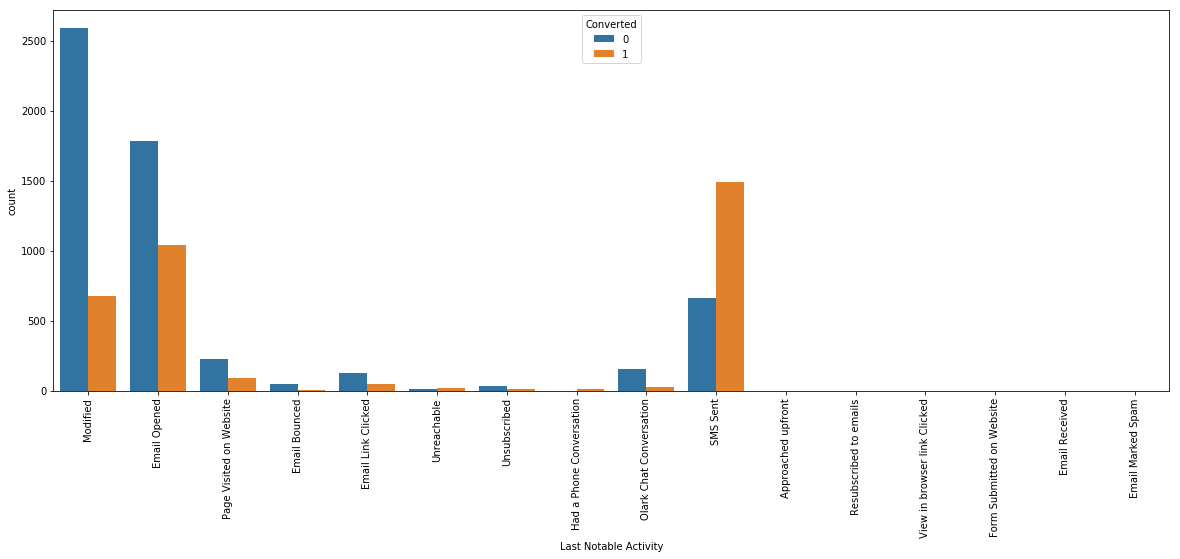

In [159]:
fig = plt.figure(figsize = (20,7))
s=sns.countplot(df['Last Notable Activity'],hue=df['Converted'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [160]:
df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [161]:
# As the following activities does not seem to occur much, we can combine it as lowkey_activities 
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced','Had a Phone Conversation','Unreachable','Unsubscribed','Email Marked Spam','Form Submitted on Website',
                                                                   'View in browser link Clicked','Approached upfront','Resubscribed to emails','Email Received'], 'lowkey_activities ')

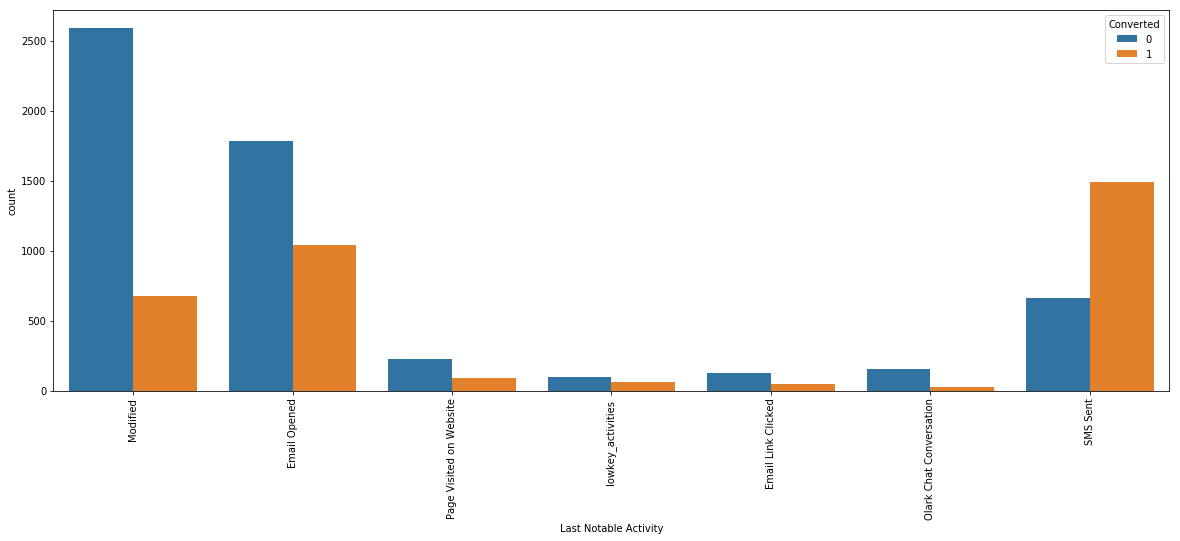

In [162]:
fig = plt.figure(figsize = (20,7))
s = sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Leads with last notable activity sms sent has higher conversion rate

### DATA PREPARATION

In [163]:
print(df.shape)

(9074, 18)


In [164]:
df.select_dtypes('object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,Page Visited on Website,Undecided,Unemployed,Better Career Prospects,other_intrerests,Low_worst_relevence,Other Leads,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,Email Opened,Undecided,Unemployed,Better Career Prospects,Ringing,Not Sure,Other Leads,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,Email Opened,Business,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,Cannot_Identify,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Other Leads,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,Converted to Lead,Undecided,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Other Leads,Mumbai,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,No,Olark Chat Conversation,Undecided,Other,Other,Will revert after reading the email,Not Sure,Other Leads,Mumbai,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,Email Opened,Management,Unemployed,Better Career Prospects,Will revert after reading the email,Low_worst_relevence,Potential Lead,Mumbai,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,No,Olark Chat Conversation,Undecided,Other,Other,Will revert after reading the email,Not Sure,Other Leads,Mumbai,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,No,Email Opened,Management,Other,Other,Will revert after reading the email,Not Sure,Other Leads,Other Cities of Maharashtra,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,No,Email Opened,Management,Other,Other,Will revert after reading the email,Not Sure,Other Leads,Mumbai,No,Email Opened


In [165]:
df_lead=df.copy()
df_lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Undecided,Unemployed,Better Career Prospects,other_intrerests,Low_worst_relevence,Other Leads,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Undecided,Unemployed,Better Career Prospects,Ringing,Not Sure,Other Leads,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Cannot_Identify,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Other Leads,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Undecided,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Other Leads,Mumbai,No,Modified


In [166]:
df_lead=df_lead.drop('Prospect ID',axis=1)

### ENCODING

##### BINARY ENCODING - 'Do Not Email', 'A free copy of Mastering The Interview' features

In [167]:
df_lead['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [168]:
df_lead['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [169]:
df_lead['Do Not Email'] = df_lead['Do Not Email'].map({'Yes':1,'No':0})
df_lead['A free copy of Mastering The Interview'] = df_lead['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

##### DUMMY VARIABLES

In [170]:
# category variables
cat_cols = list(df_lead.select_dtypes(include=['object']).columns)
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Last Notable Activity']

In [171]:
df_cat = pd.get_dummies(df_lead[cat_cols],drop_first=True)
df_lead = pd.concat([df_lead,df_cat],axis=1)
df_lead.drop(cat_cols,axis=1,inplace=True)


In [172]:
print(df_lead.shape)
df_lead.head()

(9074, 54)


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Other_Channel,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Channel,Lead Source_Reference,Lead Source_Social_Channels,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Low_Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Undecided,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_miscellaneous,Tags_other_intrerests,Tags_phone_tags,Tags_student_tags,Lead Quality_Low_worst_relevence,Lead Quality_Might be,Lead Quality_Not Sure,Lead Profile_Potential Lead,Lead Profile_student Leads,City_Other Cities of Maharashtra,City_other cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_lowkey_activities
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


#### TRAIN-TEST SPLIT

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
# Putting feature variable to X
X = df_lead.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Other_Channel,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Channel,Lead Source_Reference,Lead Source_Social_Channels,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Low_Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Undecided,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_miscellaneous,Tags_other_intrerests,Tags_phone_tags,Tags_student_tags,Lead Quality_Low_worst_relevence,Lead Quality_Might be,Lead Quality_Not Sure,Lead Profile_Potential Lead,Lead Profile_student Leads,City_Other Cities of Maharashtra,City_other cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_lowkey_activities
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [175]:
# Putting response variable to y
y = df_lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [176]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### FEATURE SCALING- using Standard scaler

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [178]:
#applying scaler to all variables except dummy variables
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Other_Channel,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Channel,Lead Source_Reference,Lead Source_Social_Channels,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Low_Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Undecided,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_miscellaneous,Tags_other_intrerests,Tags_phone_tags,Tags_student_tags,Lead Quality_Low_worst_relevence,Lead Quality_Might be,Lead Quality_Not Sure,Lead Profile_Potential Lead,Lead Profile_student Leads,City_Other Cities of Maharashtra,City_other cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_lowkey_activities
3009,0,-0.432779,-0.160255,-0.155018,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
7987,0,0.643547,2.017593,0.122613,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


#### Looking at Correlations

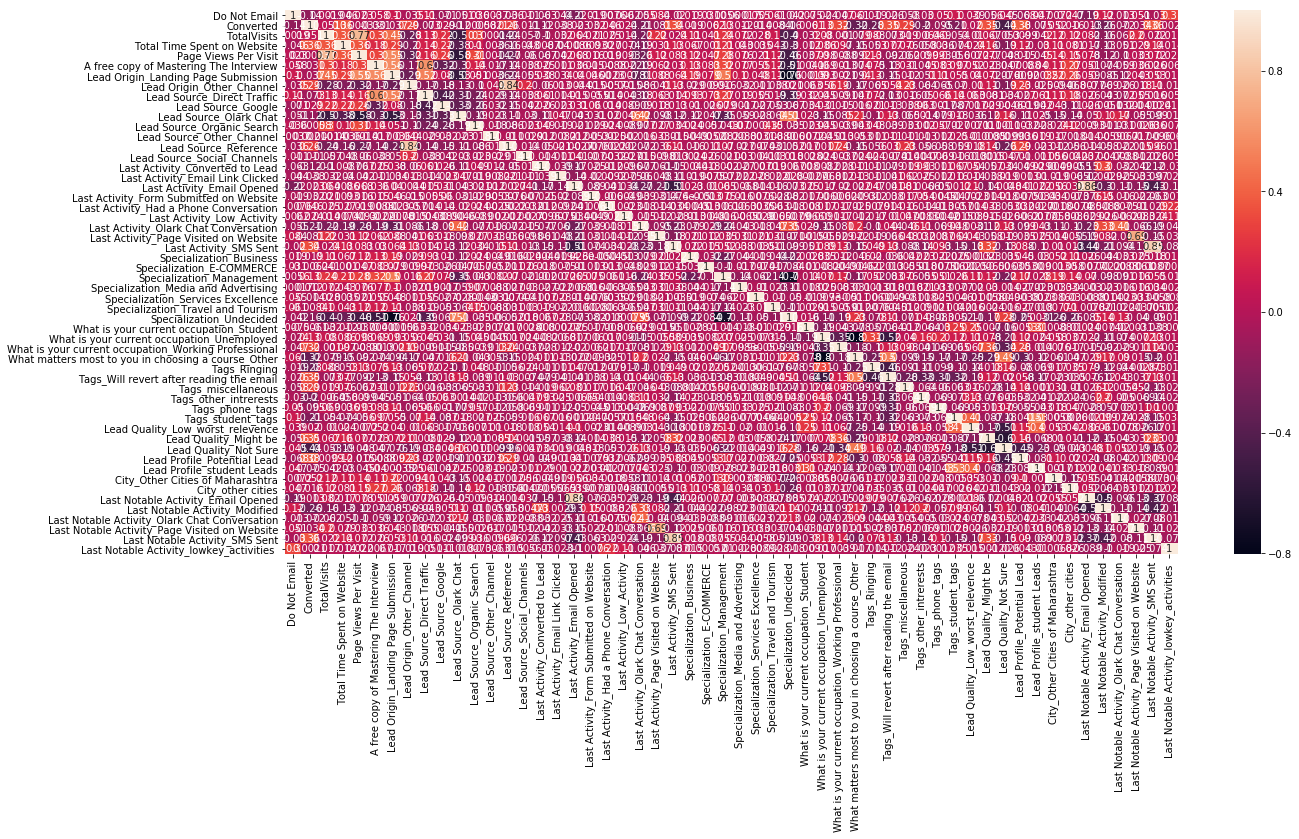

In [179]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_lead.corr(),annot = True)
plt.show()

- As there are number of variables, dropping them manually or selecting after checking correlations will be tedious and time consuming method,
- Lets approach it using auto methods

### FEATURE SELECTION
- Feature selection can be done by PCA or RFE.
- In RFE, we have to specify the no of features. As we are not sure how many features may influence the conversion and as we have an option of PCA, Choosing to first try PCA
- PCA also leads to dimensionality reduction & multi-collinearity in a much effective way than RFE

### PCA
- we'll first calculate the PCs using the train data, and apply them later on the test data

### PCA-TRAIN DATASET

In [180]:
X_train.shape

(6351, 53)

In [181]:
#Importing required library
from sklearn.decomposition import PCA

#Instantiate
pca = PCA(random_state=42)

#Fit PCA on scaled train dataset
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [182]:
pca.components_


array([[ 1.82749922e-03,  5.61604715e-01,  3.99947584e-01, ...,
         1.25716249e-02,  3.13948524e-02,  2.22705145e-03],
       [-1.60302294e-02, -3.19934095e-01,  7.51111232e-01, ...,
        -1.55148700e-02,  1.96602104e-01, -3.26592652e-05],
       [-1.27430219e-02,  1.50607647e-01,  3.42085377e-01, ...,
         9.98338393e-03, -7.50529720e-02, -1.04152278e-03],
       ...,
       [-1.00123793e-02,  3.69207147e-03,  3.89641802e-04, ...,
         6.37619052e-03,  4.30798495e-03, -5.53159886e-03],
       [-8.33466740e-03,  2.84200109e-04,  7.01597450e-04, ...,
        -1.31961720e-03,  3.64420479e-03,  1.91135379e-02],
       [ 6.98234705e-03, -1.79800528e-04, -5.30692581e-04, ...,
         3.95577065e-01,  3.81572915e-01,  4.16203059e-01]])

#### Explained variance ratio for each component

In [183]:
pca.explained_variance_ratio_

array([2.86557093e-01, 9.96616755e-02, 7.85059475e-02, 7.08457456e-02,
       6.02178213e-02, 5.27403690e-02, 4.07828557e-02, 3.63104974e-02,
       2.70385256e-02, 1.95618945e-02, 1.74772160e-02, 1.60874467e-02,
       1.55830700e-02, 1.53363472e-02, 1.38058218e-02, 1.27798439e-02,
       1.24541010e-02, 1.05146045e-02, 9.65303243e-03, 8.86353005e-03,
       8.43028064e-03, 8.26829967e-03, 8.09367662e-03, 7.53436512e-03,
       6.96370456e-03, 5.72210752e-03, 5.60354132e-03, 5.45746275e-03,
       4.57875726e-03, 3.89282321e-03, 3.61843204e-03, 3.49414444e-03,
       2.88457903e-03, 2.61859559e-03, 2.45359745e-03, 2.07975781e-03,
       1.96954096e-03, 1.68605548e-03, 1.64615983e-03, 1.58948444e-03,
       1.48833322e-03, 1.24200298e-03, 7.02169046e-04, 6.02120029e-04,
       4.33676787e-04, 4.07669703e-04, 3.66964479e-04, 3.53069265e-04,
       3.10201553e-04, 2.41293340e-04, 2.15155546e-04, 1.61986480e-04,
       1.12552730e-04])

#### SCREE PLOT

In [184]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.28655709, 0.38621877, 0.46472472, 0.53557046, 0.59578828,
       0.64852865, 0.68931151, 0.72562201, 0.75266053, 0.77222243,
       0.78969964, 0.80578709, 0.82137016, 0.83670651, 0.85051233,
       0.86329217, 0.87574627, 0.88626088, 0.89591391, 0.90477744,
       0.91320772, 0.92147602, 0.9295697 , 0.93710406, 0.94406777,
       0.94978987, 0.95539341, 0.96085088, 0.96542963, 0.96932246,
       0.97294089, 0.97643503, 0.97931961, 0.98193821, 0.98439181,
       0.98647156, 0.98844111, 0.99012716, 0.99177332, 0.9933628 ,
       0.99485114, 0.99609314, 0.99679531, 0.99739743, 0.99783111,
       0.99823878, 0.99860574, 0.99895881, 0.99926901, 0.99951031,
       0.99972546, 0.99988745, 1.        ])

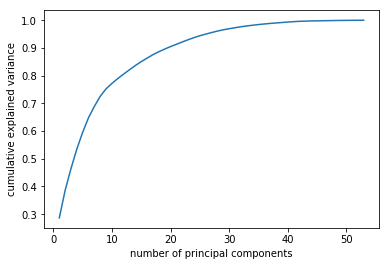

In [185]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.show()

##### Around 95% of variance is explained by 25 principal components`. We have to choose 25 components for our model building.
##### As building a model with 25 componants wil not be effective, we will go ahead with RFE method of feature selection followed ny manual selection

### MODEL BUILDING

### MODEL 1

In [186]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1073.1
Date:                Sun, 06 Oct 2019   Deviance:                       2146.2
Time:                        12:38:39   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2334      1.543     -0.151      0.880      -3.257       2.791
Do Not Email                                            -1.7690      0.319     -5.540      0.000      -2.395      -1.143
TotalVisits                                              0.2391      0.095      2.517      0.012       0.053       0.425
Total Time Spent on Website                              1.1629      0.068     17.221      0.000       1.031       1.295
Page Views Per Visit                                    -0.3613      0.106     -3.410      0.001      -0.569      -0.154
A free copy of Mastering The Interview                  -0.3650      0.188     -1.946      0.052      -0.733       0.003
Lead Origin_Landing Page Submission                     -0.3836      0.241     -1.595      0.111      -0.855       0.088
Lead Origin_Other_Channel                                1.4550      0.686      2.120      0.034       0.110       2.801
Lead Source_Direct Traffic                              -0.7314      0.486     -1.504      0.133      -1.684       0.222
Lead Source_Google                                      -0.7240      0.472     -1.534      0.125      -1.649       0.201
Lead Source_Olark Chat                                  -0.0186      0.499     -0.037      0.970      -0.997       0.959
Lead Source_Organic Search                              -0.6239      0.484     -1.290      0.197      -1.572       0.324
Lead Source_Other_Channel                               -0.3626      1.187     -0.306      0.760      -2.688       1.963
Lead Source_Reference                                   -1.2044      0.695     -1.733      0.083      -2.567       0.158
Lead Source_Social_Channels                             -2.2895      0.897     -2.552      0.011      -4.048      -0.531
Last Activity_Converted to Lead                         -0.4983      0.636     -0.784      0.433      -1.745       0.748
Last Activity_Email Link Clicked                         0.6244      0.823      0.759      0.448      -0.988       2.237
Last Activity_Email Opened                              -0.2785      0.599     -0.465      0.642      -1.453       0.896
Last Activity_Form Submitted on Website                 -0.2248      0.747     -0.301      0.763      -1.689       1.240
Last Activity_Had a Phone Conversation                   0.8927      1.626      0.549      0.583      -2.294       4.080
Last Activity_Low_Activity                               0.8950      1.823      0.491      0.624      -2.679       4.469
Last Activity_Olark Chat Conversation                   -1.0206      0.606     -1.684      0.092      -2.208       0.167
Last Activity_Page Visited on Website                    0.0753      0.649      0.116      0.908      -1.197       1.347
Last Activity_SM

- From the above summary, its very evident that many variables have p value greater than 0.05.
- We will first run rfe with 15 features and proceed with manual feature selection there on.

### Feature Selection Using RFE

In [187]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [188]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [189]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False,  True, False])

In [190]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Other_Channel', True, 1),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 37),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Other_Channel', False, 27),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Social_Channels', True, 1),
 ('Last Activity_Converted to Lead', False, 13),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 29),
 ('Last Activity_Form Submitted on Website', False, 32),
 ('Last Activity_Had a Phone Conversation', False, 16),
 ('Last Activity_Low_Activity', False, 19),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last Activity_

In [191]:
col = X_train.columns[rfe.support_]

In [192]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other_Channel', 'Lead Source_Social_Channels', 'Last Activity_SMS Sent', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_Other', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_miscellaneous', 'Tags_student_tags', 'Lead Profile_Potential Lead', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent'], dtype='object')

### MODEL 2:

In [193]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.9
Date:                Sun, 06 Oct 2019   Deviance:                       2255.8
Time:                        12:38:42   Pearson chi2:                 1.16e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2098      0.168    -19.107      0.000      -3.539      -2.881
Do Not Email                                            -1.5967      0.251     -6.367      0.000      -2.088      -1.105
Total Time Spent on Website                              1.0104      0.057     17.623      0.000       0.898       1.123
Lead Origin_Other_Channel                                1.6587      0.334      4.965      0.000       1.004       2.314
Lead Source_Social_Channels                             -1.6518      0.785     -2.103      0.035      -3.191      -0.112
Last Activity_SMS Sent                                   1.4550      0.229      6.343      0.000       1.005       1.905
What is your current occupation_Working Professional     1.1996      0.343      3.492      0.000       0.526       1.873
What matters most to you in choosing a course_Other     -3.6721      0.145    -25.366      0.000      -3.956      -3.388
Tags_Ringing                                            -2.5566      0.284     -9.002      0.000      -3.113      -2.000
Tags_Will revert after reading the email                 4.6757      0.178     26.206      0.000       4.326       5.025
Tags_miscellaneous                                       9.2297      0.590     15.635      0.000       8.073      10.387
Tags_student_tags                                       -1.7061      0.607     -2.813      0.005      -2.895      -0.517
Lead Profile_Potential Lead                              1.3549      0.189      7.152      0.000       0.984       1.726
Last Notable Activity_Modified                          -1.1132      0.156     -7.127      0.000      -1.419      -0.807
Last Notable Activity_Olark Chat Conversation           -1.8315      0.465     -3.942      0.000      -2.742      -0.921
Last Notable Activity_SMS Sent                           0.9625      0.269      3.580      0.000       0.436       1.489
========================================================================================================================
"""

- The p-values for all the 15 features are below 0.05, which means all the features are statistically significant

#### PREDICTIONS ON TRAIN DATA SET - MODEL 2

In [194]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [195]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08563466, 0.04113172, 0.00179233, 0.86663763, 0.99977525,
       0.99191465, 0.04324501, 0.75606371, 0.98572355, 0.02799389])

##### Creating a dataframe with the actual CONVERSION flag and the predicted probabilities

In [196]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.085635,3009
1,0,0.041132,1012
2,0,0.001792,9226
3,1,0.866638,4750
4,1,0.999775,7987


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [197]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.085635,3009,0
1,0,0.041132,1012,0
2,0,0.001792,9226,0
3,1,0.866638,4750,1
4,1,0.999775,7987,1


In [198]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3726  179]
 [ 247 2199]]


In [199]:
# Predicted     not_converted    converted
# Actual
# not_converted        3726      179
# converted            247       2199  

In [200]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9329239489844119


#### Checking VIFs - MODEL 2

In [201]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'pd' is not defined

- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Last Notable Activity_SMS Sent' has the highest VIF. So let's start by dropping that.

In [203]:
col = col.drop('Last Notable Activity_SMS Sent', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Other_Channel', 'Lead Source_Social_Channels', 'Last Activity_SMS Sent', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_Other', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_miscellaneous', 'Tags_student_tags', 'Lead Profile_Potential Lead', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation'], dtype='object')

### MODEL 3:

In [204]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1134.5
Date:                Sun, 06 Oct 2019   Deviance:                       2268.9
Time:                        12:38:44   Pearson chi2:                 1.16e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0425      0.158    -19.247      0.000      -3.352      -2.733
Do Not Email                                            -1.6012      0.253     -6.319      0.000      -2.098      -1.105
Total Time Spent on Website                              1.0042      0.057     17.605      0.000       0.892       1.116
Lead Origin_Other_Channel                                1.5582      0.333      4.684      0.000       0.906       2.210
Lead Source_Social_Channels                             -1.7028      0.787     -2.163      0.031      -3.246      -0.160
Last Activity_SMS Sent                                   2.1425      0.126     16.990      0.000       1.895       2.390
What is your current occupation_Working Professional     1.1857      0.342      3.469      0.001       0.516       1.855
What matters most to you in choosing a course_Other     -3.7174      0.145    -25.616      0.000      -4.002      -3.433
Tags_Ringing                                            -2.4858      0.281     -8.850      0.000      -3.036      -1.935
Tags_Will revert after reading the email                 4.6289      0.177     26.207      0.000       4.283       4.975
Tags_miscellaneous                                       9.2875      0.597     15.547      0.000       8.117      10.458
Tags_student_tags                                       -1.8272      0.605     -3.019      0.003      -3.014      -0.641
Lead Profile_Potential Lead                              1.3470      0.189      7.117      0.000       0.976       1.718
Last Notable Activity_Modified                          -1.4570      0.127    -11.450      0.000      -1.706      -1.208
Last Notable Activity_Olark Chat Conversation           -1.9415      0.465     -4.177      0.000      -2.853      -1.030
========================================================================================================================
"""

- The p-values for all the 14features are below 0.05, which means all the features are statistically significant

#### PREDICTIONS ON TRAIN DATA SET - MODEL 3

In [205]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [206]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09179649, 0.04357318, 0.00321996, 0.84047552, 0.99987114,
       0.99052433, 0.04670863, 0.73338842, 0.98711138, 0.04847768])

##### Creating a dataframe with the actual CONVERSION flag and the predicted probabilities

In [207]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.091796,3009
1,0,0.043573,1012
2,0,0.003220,9226
3,1,0.840476,4750
4,1,0.999871,7987


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [208]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.091796,3009,0
1,0,0.043573,1012,0
2,0,0.003220,9226,0
3,1,0.840476,4750,1
4,1,0.999871,7987,1


### Calculating conversion rate

In [209]:
pred_con_per = round(((sum(y_train_pred_final['predicted'])/len(y_train_pred_final))*100),2)
pred_con_per

37.27

In [210]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9333963155408597


- The accuracy is still practically the same.

#### Checking VIFs - MODEL 3

In [211]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,3.75
6,What matters most to you in choosing a course_...,2.80
4,Last Activity_SMS Sent,1.58
12,Last Notable Activity_Modified,1.56
2,Lead Origin_Other_Channel,1.50
11,Lead Profile_Potential Lead,1.50
9,Tags_miscellaneous,1.29
5,What is your current occupation_Working Profes...,1.27
1,Total Time Spent on Website,1.22
7,Tags_Ringing,1.14


- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

- LETS LOOK AT THE CONFUSION MATRIX AGAIN

In [212]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3733  172]
 [ 251 2195]]


In [213]:
# Predicted     not_converted    converted
# Actual
# not_converted        3733      172
# converted            251       2195  

###  Metrics beyond simple accuracy
- Lets check for metrics other than accuracy

In [214]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### SENSITIVITY & SPECIFICITY:

In [215]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.8973834832379395

In [216]:
# Let us calculate specificity
TN / float(TN+FP)

0.9559539052496799

In [217]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.044046094750320106


In [218]:
# positive predictive value 
print (TP / float(TP+FP))

0.9273341782847486


In [219]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9369979919678715


#### Plotting the ROC Curve

In [220]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [221]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

In [222]:
print(fpr.shape)
print(tpr)

(4560,)
[0.00000000e+00 4.08830744e-04 8.17661488e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


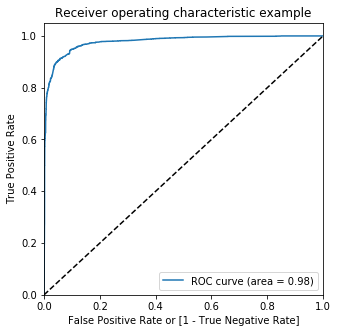

In [223]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [224]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.091796,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.043573,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003220,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.840476,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.999871,7987,1,1,1,1,1,1,1,1,1,1,1
5,1,0.990524,1281,1,1,1,1,1,1,1,1,1,1,1
6,0,0.046709,2880,0,1,0,0,0,0,0,0,0,0,0
7,1,0.733388,4971,1,1,1,1,1,1,1,1,1,0,0
8,1,0.987111,7536,1,1,1,1,1,1,1,1,1,1,1
9,0,0.048478,1248,0,1,0,0,0,0,0,0,0,0,0


In [225]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.881593  0.973835  0.823816
0.2   0.2  0.913242  0.952576  0.888604
0.3   0.3  0.918281  0.930908  0.910371
0.4   0.4  0.930090  0.912919  0.940845
0.5   0.5  0.933396  0.897383  0.955954
0.6   0.6  0.932924  0.883892  0.963636
0.7   0.7  0.922374  0.840556  0.973624
0.8   0.8  0.912297  0.795993  0.985147
0.9   0.9  0.895135  0.739984  0.992318


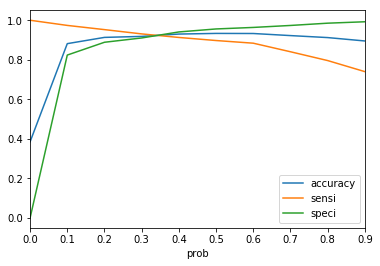

In [226]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [227]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.091796,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.043573,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.003220,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.840476,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.999871,7987,1,1,1,1,1,1,1,1,1,1,1,1
5,1,0.990524,1281,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.046709,2880,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0.733388,4971,1,1,1,1,1,1,1,1,1,0,0,1
8,1,0.987111,7536,1,1,1,1,1,1,1,1,1,1,1,1
9,0,0.048478,1248,0,1,0,0,0,0,0,0,0,0,0,0


##  Adding Lead Score to the data frame

In [228]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.091796,3009,0,1,0,0,0,0,0,0,0,0,0,0,9
1,0,0.043573,1012,0,1,0,0,0,0,0,0,0,0,0,0,4
2,0,0.003220,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.840476,4750,1,1,1,1,1,1,1,1,1,1,0,1,84
4,1,0.999871,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


### Calculating conversion rate

In [229]:
pred_conversion_percentage = round(((sum(y_train_pred_final['final_predicted'])/len(y_train_pred_final))*100),2)
pred_conversion_percentage

39.66

- its almost equal and tehre is no huge difference. It means our model is correct fit on the data.`

In [230]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.93

In [231]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3636,  269],
       [ 196, 2250]], dtype=int64)

In [232]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [233]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.92

In [234]:
# Let us calculate specificity
round(TN / float(TN+FP),2)

0.93

In [235]:
# Calculate false postive rate - predicting churn when customer does not have churned
round(FP/ float(TN+FP),2)

0.07

In [236]:
# Positive predictive value 
round(TP / float(TP+FP),2)

0.89

In [237]:
# Negative predictive value
round(TN / float(TN+ FN),2)

0.95

### Precision and Recall

In [238]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3733,  172],
       [ 251, 2195]], dtype=int64)

##### Precision
TP / TP + FP

In [239]:
round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2)

0.93

In [240]:
# USING SKLEARN UTILITIES FOR PRECISION SCORE

from sklearn.metrics import precision_score, recall_score

In [241]:
round(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2)

0.93

##### Recall
TP / TP + FN

In [242]:
round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2)

0.9

In [243]:
# USING SKLEARN UTILITIES FOR RECALL SCORE
round(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2)

0.9

#### Precision and recall tradeoff

In [244]:
from sklearn.metrics import precision_recall_curve

In [245]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [246]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

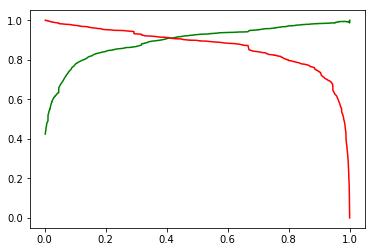

In [247]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [248]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.091796,3009,0,1,0,0,0,0,0,0,0,0,0,0,9
1,0,0.043573,1012,0,1,0,0,0,0,0,0,0,0,0,0,4
2,0,0.003220,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.840476,4750,1,1,1,1,1,1,1,1,1,1,0,1,84
4,1,0.999871,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


##  Adding Lead Score to the data frame

In [249]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.091796,3009,0,1,0,0,0,0,0,0,0,0,0,0,9
1,0,0.043573,1012,0,1,0,0,0,0,0,0,0,0,0,0,4
2,0,0.003220,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.840476,4750,1,1,1,1,1,1,1,1,1,1,0,1,84
4,1,0.999871,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [250]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.93

In [251]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3636,  269],
       [ 196, 2250]], dtype=int64)

In [252]:
#lets check precision score after optimal point
round(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)


0.91

In [253]:
#lets check recall score after optimal point
round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.91

### Making predictions on the test set

In [254]:
#applying scaler to all variables except dummy variables
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[num_vars]=scaler.transform(X_test[num_vars])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Other_Channel,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Channel,Lead Source_Reference,Lead Source_Social_Channels,Last Activity_Converted to Lead,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Low_Activity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Undecided,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_miscellaneous,Tags_other_intrerests,Tags_phone_tags,Tags_student_tags,Lead Quality_Low_worst_relevence,Lead Quality_Might be,Lead Quality_Not Sure,Lead Profile_Potential Lead,Lead Profile_student Leads,City_Other Cities of Maharashtra,City_other cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_lowkey_activities
3271,0,0.284772,-0.600595,0.955505,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1490,0,0.643547,1.887326,1.510766,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
7936,0,-0.432779,-0.752879,-0.155018,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4216,0,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3830,0,1.719873,-0.587751,2.066027,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [255]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Other_Channel,Lead Source_Social_Channels,Last Activity_SMS Sent,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_miscellaneous,Tags_student_tags,Lead Profile_Potential Lead,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,0,-0.600595,0,0,0,0,1,0,1,0,0,0,0,0
1490,0,1.887326,0,0,0,1,0,0,1,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,1,0,1,0,0,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,0,1,0,0,1,0
3830,0,-0.587751,0,0,0,0,1,0,1,0,0,0,0,0


In [256]:
X_test_sm = sm.add_constant(X_test)

- Making predictions on the test set

In [257]:
y_test_pred = res.predict(X_test_sm)

In [258]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [259]:
y_pred_df.head()

,0
3271,0.060991
1490,0.997563
7936,0.052799
4216,0.995738
3830,0.061734


In [260]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [261]:
# Putting CustID to index
y_test_df['ProspectID'] = y_test_df.index

In [262]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [263]:
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [264]:
y_pred_final.head()

,Converted,ProspectID,0
0,0,3271,0.060991
1,1,1490,0.997563
2,0,7936,0.052799
3,1,4216,0.995738
4,0,3830,0.061734


In [265]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [266]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Converted_prob'], axis=1)

In [267]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Converted_prob
0,3271,0,0.060991
1,1490,1,0.997563
2,7936,0,0.052799
3,4216,1,0.995738
4,3830,0,0.061734


#### CUT-OFF PROBABILITY:
- Sensitivity & specificity trade-off: 0.35
- Precision recall trade-off: 0.4
- As there is no much difference between both the trade-off,we can choose any oneas  there wont be any impact in test metrics between 0.35 & 0.4
- Choosing 0.35 as cut-off probability to make prediction on test dataset

In [268]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [269]:
y_pred_final.head()

,ProspectID,Converted,Converted_prob,final_predicted
0,3271,0,0.060991,0
1,1490,1,0.997563,1
2,7936,0,0.052799,0
3,4216,1,0.995738,1
4,3830,0,0.061734,0


### TEST DATA METRICS:

#### ACCURACY:
- Its the percentage of correctly predicted labels - in our case,percentage of correctly predicting the leads that will be converted

In [270]:
print("TEST DATA ACCURACY:", round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2))

TEST DATA ACCURACY: 0.92


##### Training data:
- senitivity & specificity:0.93 (cuttff o.35)
- precision & recall:0.93 (cuttff o.40)

#### The difference in training & test accuracy is less than 5%. WHich means model has around 92% accuracy

#### CONFUSION MATRIX:

In [271]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1601,  133],
       [  96,  893]], dtype=int64)

In [272]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### SENSITIVITY ALIAS RECALL:
- Sensitivity & recall are one and the same.
- The ability of a model to correctly predict the leads which will be converted

In [273]:
print("TEST DATA SENSITIVITY:", round(TP / float(TP+FN),2))

TEST DATA SENSITIVITY: 0.9


In [274]:
print("TEST DATA RECALL:",round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted),2))

TEST DATA RECALL: 0.9


##### Training data:
- senitivity:0.92 (cuttff o.35)
- recall:0.91 (cuttff o.40)
- The difference in train data is due to different cut off taken

#### The difference in training & test sensitivity/recall is less than 5%. WHich means  model is correctly able to predict 90% of leads that willbe converted

#### SPECIFICITY:
- The ability of a model to correctly predict the leads that will not be converted

In [275]:
print("TEST DATA SPECIFICITY:", round(TN / float(TN+FP),2))

TEST DATA SPECIFICITY: 0.92


##### Training data:
- specificity:0.93 (cuttff o.35)

#### The difference in training & test data is less than 5%. Means the model is correctly able to predict the leads that will not be converted

#### PRECISION or Positive Predictive Value:
- Probability that predicted potential lead is actually a lead

In [276]:
print("TEST DATA PRECISION:", round(precision_score(y_pred_final.Converted, y_pred_final.final_predicted),2))
print("TEST DATA Positive Predictive value:",round((TP / float(TP+FP)),2))

TEST DATA PRECISION: 0.87
TEST DATA Positive Predictive value: 0.87


##### Training data:
- Precision:0.91 (cuttff 0.40)
- Positive predictive value: 0.89 ((cuttff 0.35)
#### The difference in training & test data is less than 5%. Which means model is able to label 87%of leads as converted,which is actually a converted lead

#### False Positive Rate:

In [277]:
print("False positive rate-Test data:", round(FP/ float(TN+FP),2))

False positive rate-Test data: 0.08


##### Training data
- False Positive rate: 0.07 ((cuttff 0.35)
#### The difference in training & test accuracy is less than 5%. 

#### Negative Predictive value:

In [278]:
# Negative predictive value
print("Neg Predictive Value-Test data:", round(TN / float(TN+ FN),2))

Neg Predictive Value-Test data: 0.94


##### Training data
- Neg predixctive valuee: 0.95 ((cuttff 0.35)
#### The difference in training & test data is less than 5%. 

## SUMMARY

- With model 3, we are able to achieve 93% accuracy on train data with 14 features
- The p value is less than 0.05 and vifs are less than 5 for model 3, which indicates features are signifcant & there is no multicollinearity in the data
- Othere metrics are also above 90%
- Hence we used this model to make preditions on test set
- The difference between below metrics on train and test data is less than 5%
        - Accuracy in test data is 92%
        - sensitivity or recall is 90%
        - specificity & precision or positive predictive values - 92%
- As the metrics between test and train data is of not much difference, model is not overfit or underfit.
- hence we can use this model to predict the hot leads.

- Equation of multivariate logistic regression is:
    P=1/1+e−(β0+β1X1+β2X2+β3X3+...+βnXn) = 1/1+e-(-3.04 + 

$ P = 1/1+e-[(1.00 * total time spent on website)- (1.60 * do not email)+(1.55 * lead origin_other channels)-(1.70 * lead score_social channels)+(2.14*last activity_sms sent) = (1,18*what is ypor current occupation_working professionals)-(3.71*what matters most to you in choosing course_other)-(2.48*tags_ringing)+(4.62*tags_revert after reading email)+(9.28*tags_miscellaneous)-(1,82 * tags_student tags) + (1.34 * lead profile_potential lead) - (1.45 * last notable activity_modified)- (1.94*last notable activity_olarl chat conversation)- constant(3.04)] $

- The main aim of the exercise was to assign lead scores which will help the sales team to concentrate on potential leads to convert them to paying customers
- Lead score assigned between 0 to 100. Higher the score, more potential is the lead
- We recommend x-education to concentrate on lead with high score and from Mumbai city
- Leads with tags ‘will revert after mail’ have higer conversion rate and can be concentrated more.
- Last_activiy sms sent & lead profile potential lead show better prospects of conversion
- Working professionals looking for better career aspects are prone for conversion
- Leads who chose do not email and lead source from social channels mostly will not get converted and needs less concentration
- Lead originated from other channels have better conversion rate and olark chat conversation leads do not show conversion signs